In [3]:
import os
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src_dir = os.path.join(parent_dir, 'src')
sys.path.append(src_dir)

import train_CNN
import preprocess_data

In [ ]:
train=False
if train:
    preprocess_data.main()
    train_CNN.train()

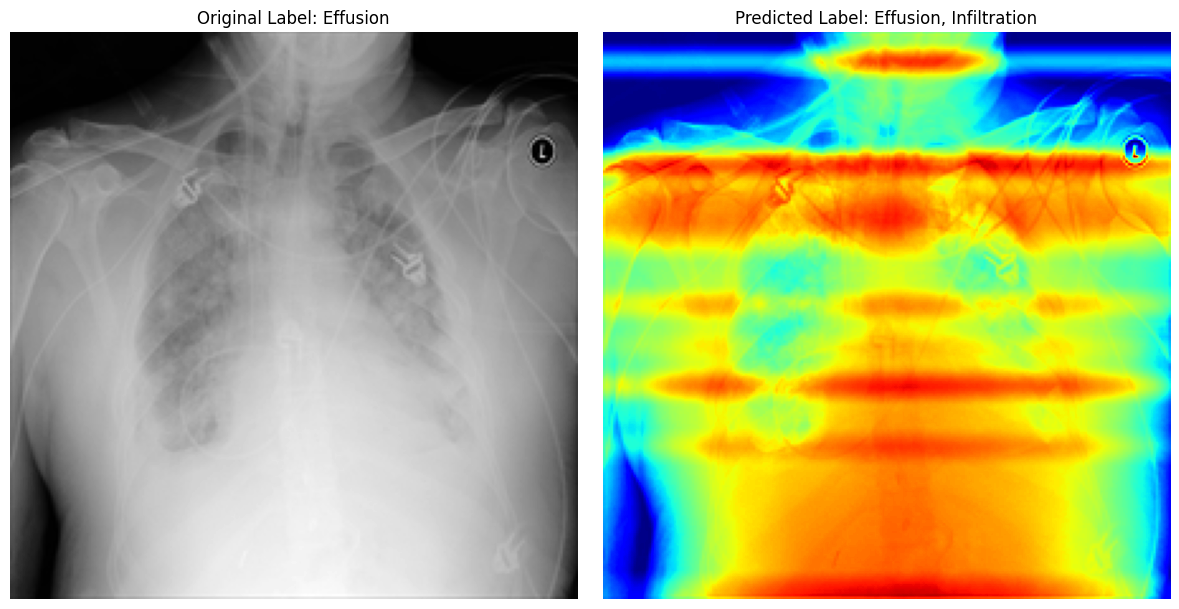

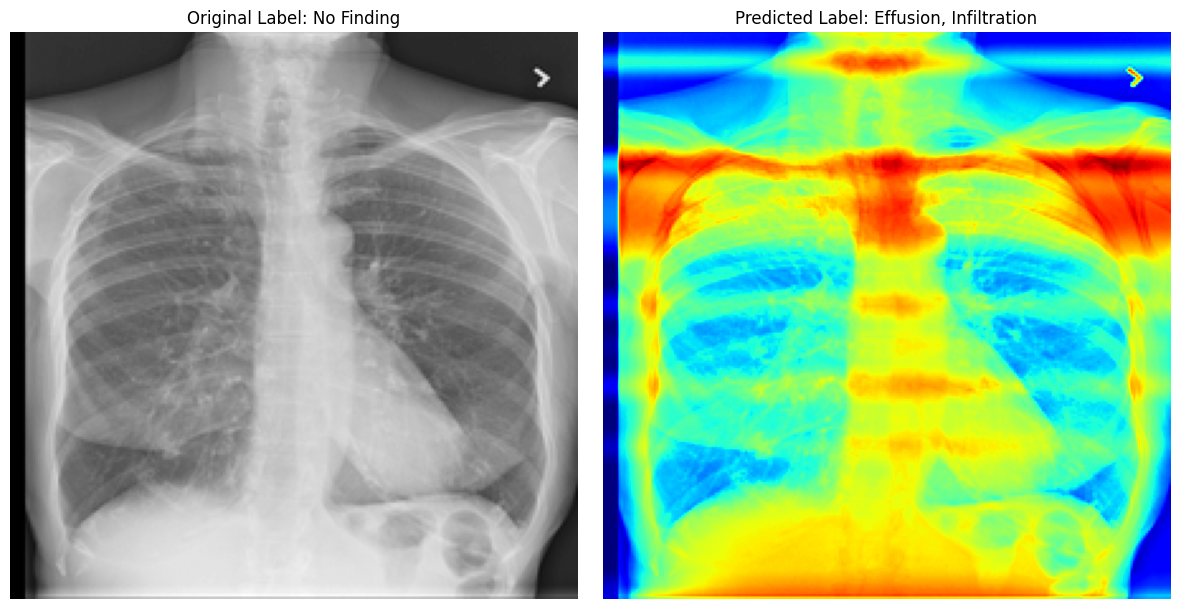

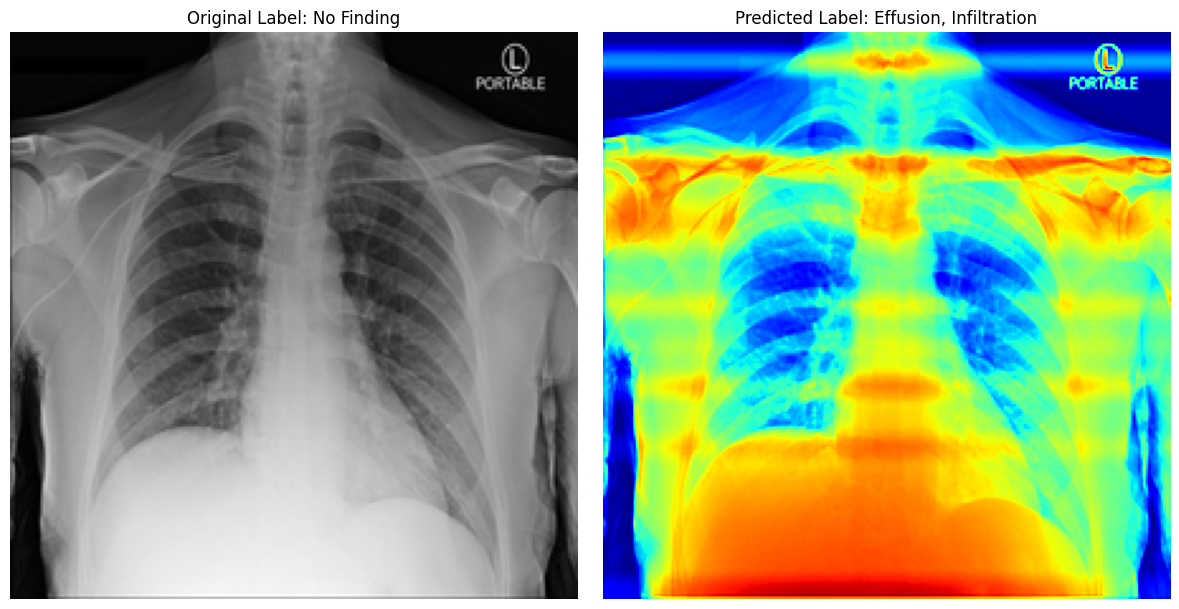

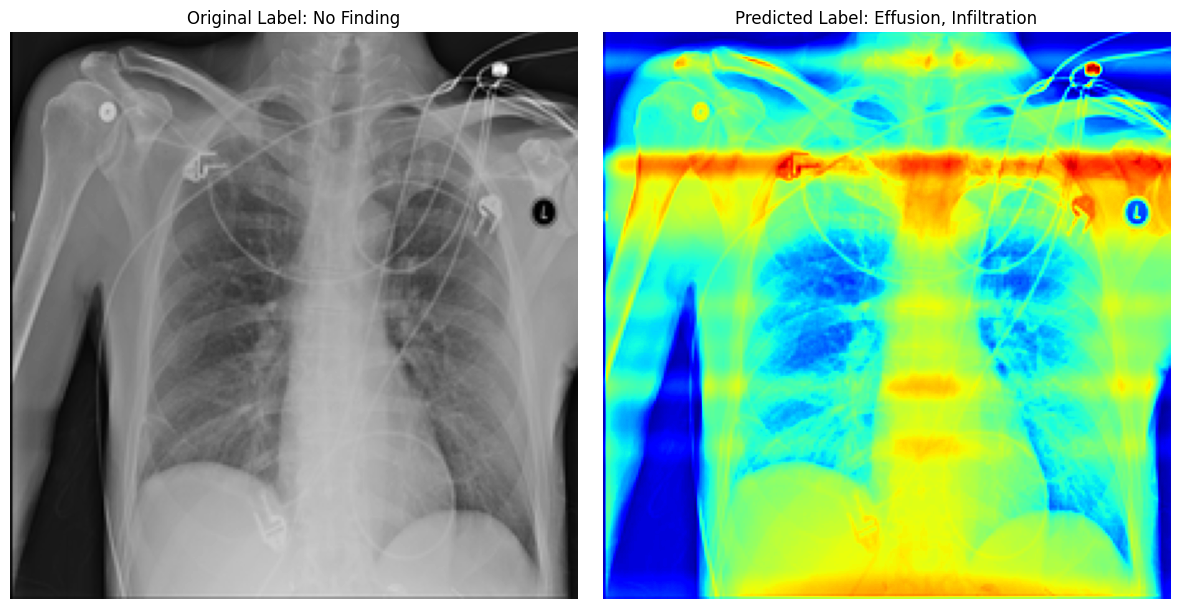

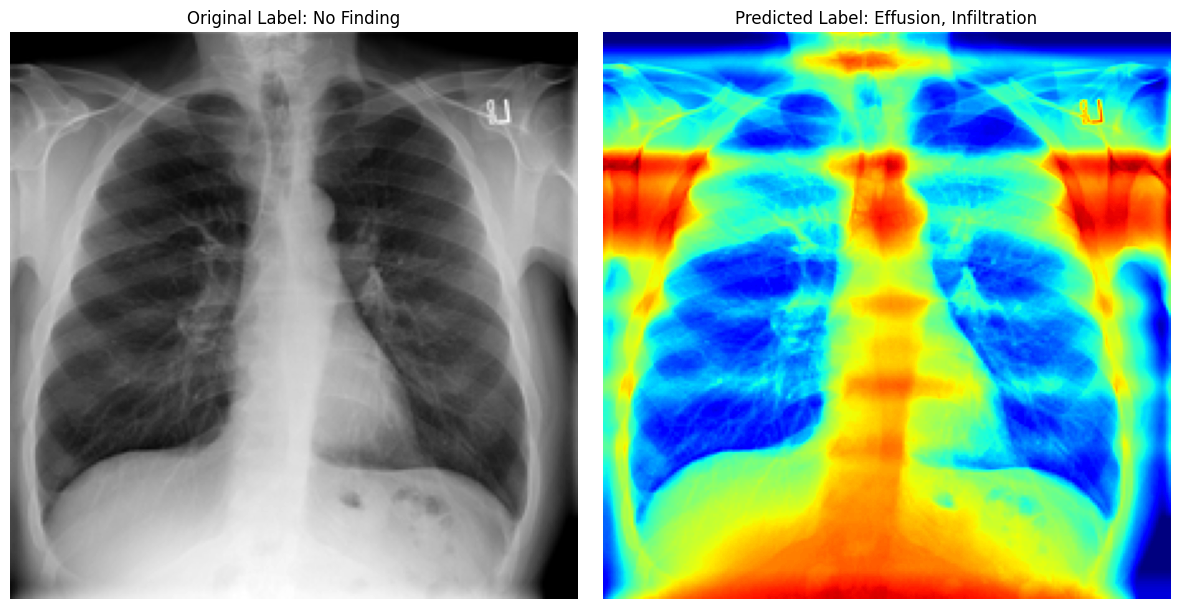

In [4]:
model_path = os.path.join(parent_dir, 'models', 'CNN_multilabel.pth')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = train_CNN.ChestXRayCNN()
model.load_state_dict(torch.load(model_path))
model.to(device)

labels_path = os.path.join(parent_dir, 'data', 'sample', 'labels.csv')
image_dir = os.path.join(parent_dir, 'data', 'sample' ,'images')

labels = pd.read_csv(labels_path)

random_sample = labels.sample(5, axis=0)

for index, row in random_sample.iterrows():
    image_path = os.path.join(image_dir, row['Image Index'])
    predictions, heatmap = train_CNN.predict_diseases(model, image_path)
    disease = ", ".join([col for col in labels.columns if row[col] == 1])
    predicted_disease = ", ".join([col for col in labels.columns[2:] if predictions[labels.columns.get_loc(col)-1] > 0.1])
    

    # Display the original image and the superimposed image
    image = Image.open(image_path).convert('L')
    image = image.resize((224, 224), Image.LANCZOS)  # Downscale the image
    img = np.array(image)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(img, cmap='gray')
    ax1.set_title(f"Original Label: {disease}")
    ax1.axis('off')
    ax2.imshow(heatmap, cmap='jet')
    ax2.set_title(f"Predicted Label: {predicted_disease}")
    ax2.axis('off')
    plt.tight_layout()
    plt.show()
    
